# Libraries

In [1]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from numpy import percentile
from numpy import mean
from numpy import std

# Change pd column options
pd.set_option('display.max_columns', None)

# Change plotting settings
plt.style.use('ggplot')
sns.set(style = 'whitegrid')

# Dataset

In [4]:
# Read file

treeCensus = pd.read_csv("../ny_street-trees_2015/2015_Street_Tree_Census_-_Tree_Data.csv")
treeCensus.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,"4,073,900",New York,40.723092,-73.844215,"1,027,431.148","202,756.7687",29.0,739,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,"4,097,300",New York,40.794111,-73.818679,"1,034,455.701","228,644.8374",19.0,973,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,"3,044,900",New York,40.717581,-73.936608,"1,001,822.831","200,716.8913",34.0,449,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,"3,044,900",New York,40.713537,-73.934456,"1,002,420.358","199,244.2531",34.0,449,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,"3,016,500",New York,40.666778,-73.975979,"990,913.775","182,202.426",39.0,165,3025654.0,3.010850e+09


In [5]:
# View dataframe's row and col size

treeCensus.shape

(683788, 45)

In [6]:
# View dataframe's col types

treeCensus.dtypes

tree_id               int64
block_id              int64
created_at           object
tree_dbh              int64
stump_diam            int64
curb_loc             object
status               object
health               object
spc_latin            object
spc_common           object
steward              object
guards               object
sidewalk             object
user_type            object
problems             object
root_stone           object
root_grate           object
root_other           object
trunk_wire           object
trnk_light           object
trnk_other           object
brch_light           object
brch_shoe            object
brch_other           object
address              object
postcode              int64
zip_city             object
community board       int64
borocode              int64
borough              object
cncldist              int64
st_assem              int64
st_senate             int64
nta                  object
nta_name             object
boro_ct             

In [7]:
# View list of all cols

treeCensus.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [8]:
# Delete unwanted cols and assign as a new dataset

treeSubset = treeCensus[['tree_id', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'created_at', 
                         'spc_latin', 'steward','sidewalk', 'problems', 'root_stone', 'root_grate', 
                         'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 
                         'brch_other']].copy()
treeSubset.head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,08/27/2015,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,09/03/2015,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,09/05/2015,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,09/05/2015,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,08/30/2015,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No


In [9]:
# View rows and cols of subset

treeSubset.shape

(683788, 20)

# Clean Up A Bit

In [10]:
# Create a mask

maskTreeSubset = ((treeSubset['status'] == 'Stump') | (treeSubset['status'] == 'Dead'))

In [11]:
# Fill specific cols w/NaNs using the mask

treeSubset.loc[maskTreeSubset] =  treeSubset.loc[maskTreeSubset].fillna("Not Applicable")

In [12]:
# View cols [5:9] 

treeSubset[treeSubset['status'] == 'Stump'].head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,Not Applicable,09/09/2015,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,Not Applicable,09/04/2015,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,Not Applicable,08/27/2015,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,Not Applicable,08/27/2015,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,Not Applicable,09/08/2015,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No


In [13]:
# Check for other NaNs (if any)

treeSubset.isna().sum()

tree_id        0
tree_dbh       0
stump_diam     0
curb_loc       0
status         0
health         1
created_at     0
spc_latin      5
steward        0
sidewalk       1
problems      49
root_stone     0
root_grate     0
root_other     0
trunk_wire     0
trnk_light     0
trnk_other     0
brch_light     0
brch_shoe      0
brch_other     0
dtype: int64

In [14]:
# View the NaN under the health col
# Data dictionary: "Field left blank if the tree is dead or stump. "
# Steward and problems are None... will use "Good"

treeSubset[treeSubset['health'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
32889,245041,16,0,OnCurb,Alive,NaN,09/21/2015,Fraxinus pennsylvanica,None,Damage,None,No,No,No,No,No,No,No,No,No


In [15]:
# View the NaNs under the species name col

treeSubset[treeSubset['spc_latin'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
356613,562532,4,0,OnCurb,Alive,Good,05/19/2016,NaN,1or2,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
427541,630814,11,0,OnCurb,Alive,Poor,07/18/2016,NaN,None,Damage,NaN,No,No,No,No,No,No,No,No,No
431417,651014,40,0,OnCurb,Alive,Good,08/02/2016,NaN,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
608632,47941,5,0,OnCurb,Alive,Good,07/03/2015,NaN,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
656960,150745,3,0,OnCurb,Alive,Good,08/16/2015,NaN,1or2,Damage,None,No,No,No,No,No,No,No,No,No


In [16]:
# View common name for species name col w/NaNs
# Not instructed in data dictionary... will use "NotNamed"

missingSpcLatin = treeCensus[treeCensus['tree_id'].isin([562532,
                                                           630814,
                                                           651014,
                                                           47941,
                                                           150745])]
missingSpcLatin

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
356613,562532,315837,05/19/2016,4,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,NoDamage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,157-021 12 AVENUE,11357,Whitestone,407,4,Queens,19,26,11,QN49,Whitestone,"4,099,100",New York,40.791332,-73.803610,"1,038,630.469","227,641.3712",19.0,991,4103675.0,4.045570e+09
427541,630814,323764,07/18/2016,11,0,OnCurb,Alive,Poor,NaN,NaN,None,NaN,Damage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,38-028 CEDAR LANE,11363,Little Neck,411,4,Queens,19,26,11,QN45,Douglas Manor-Douglaston-Little Neck,"4,148,300",New York,40.771945,-73.750414,"1,053,380.635","220,615.7964",19.0,"1,483",4168471.0,4.080630e+09
431417,651014,308540,08/02/2016,40,0,OnCurb,Alive,Good,NaN,NaN,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,81-015 91 AVENUE,11421,Woodhaven,409,4,Queens,32,38,15,QN53,Woodhaven,"4,000,800",New York,40.686902,-73.859411,"1,023,240.372","189,564.7945",32.0,8,4185286.0,4.089630e+09
608632,47941,346795,07/03/2015,5,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,NoDamage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,61-032 78 STREET,11379,Middle Village,405,4,Queens,30,30,15,QN21,Middle Village,"4,067,100",New York,40.723484,-73.880296,"1,017,429.853","202,884.0907",30.0,671,4067282.0,4.029350e+09
656960,150745,515014,08/16/2015,3,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,662 EAST 234 STREET,10466,Bronx,212,2,Bronx,11,81,36,BX44,Williamsbridge-Olinville,"2,042,000",New York,40.894521,-73.858255,"1,023,438.408","265,207.8056",11.0,420,2068064.0,2.049940e+09


In [17]:
# View the NaN under the sidewalk col
# Data dictionary: "Not recorded for dead trees and stumps" but it's alive... will use "NoDamage"

treeSubset[treeSubset['sidewalk'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
346299,540677,7,0,OffsetFromCurb,Alive,Good,12/29/2015,Gleditsia triacanthos var. inermis,None,NaN,None,No,No,No,No,No,No,No,No,No


In [18]:
# View the NaNs under the problems' col
# Not mentioned in the data dictionary... use "None"

treeSubset[treeSubset['problems'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
120289,332668,30,0,OffsetFromCurb,Alive,Fair,10/15/2015,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
121488,332669,28,0,OffsetFromCurb,Alive,Fair,10/15/2015,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
121685,332670,24,0,OffsetFromCurb,Alive,Fair,10/15/2015,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
133470,332693,11,0,OffsetFromCurb,Alive,Good,10/15/2015,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
133812,332692,15,0,OffsetFromCurb,Alive,Good,10/15/2015,Quercus palustris,None,NoDamage,NaN,No,No,No,No,No,No,No,No,No
134820,332694,28,0,OffsetFromCurb,Alive,Good,10/15/2015,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
144137,332947,3,0,OnCurb,Alive,Good,10/15/2015,Ginkgo biloba,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
145324,332543,9,0,OnCurb,Alive,Good,10/15/2015,Prunus,None,Damage,NaN,No,No,No,No,No,No,No,No,No
145337,332541,8,0,OnCurb,Alive,Good,10/15/2015,Prunus,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
146314,332542,8,0,OnCurb,Alive,Good,10/15/2015,Prunus,1or2,Damage,NaN,No,No,No,No,No,No,No,No,No


In [19]:
# Fill col NaNs

treeSubset['health'].fillna("Good", inplace=True)
treeSubset['spc_latin'].fillna("NotNamed", inplace=True)
treeSubset['sidewalk'].fillna("NoDamage", inplace=True)
treeSubset['problems'].fillna("None", inplace=True)

In [20]:
# View for other NaNs

treeSubset.isna().sum()

tree_id       0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
created_at    0
spc_latin     0
steward       0
sidewalk      0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
dtype: int64

I want to change the `tree_id` column into a string.

In [21]:
# Change tree id col to a string object

treeSubset['tree_id'] = treeSubset['tree_id'].astype(str)

The `created_at` col is currently a string but that isn't correct, it should be a date object.

In [22]:
# Change string object to a date object

treeSubset['created_at'] = pd.to_datetime(treeSubset['created_at'])
treeSubset.dtypes

tree_id               object
tree_dbh               int64
stump_diam             int64
curb_loc              object
status                object
health                object
created_at    datetime64[ns]
spc_latin             object
steward               object
sidewalk              object
problems              object
root_stone            object
root_grate            object
root_other            object
trunk_wire            object
trnk_light            object
trnk_other            object
brch_light            object
brch_shoe             object
brch_other            object
dtype: object

From the data dictionary the numerical cols are of a certain measurement. So, I want to place the unit of measure for those specific cols.

In [23]:
# Modify col names

treeSubset = treeSubset.rename(columns={'tree_id':'Tree_Id',
                          'tree_dbh':'Tree_Dbh_in',
                          'stump_diam':'Stump_Diam_in',
                          'curb_loc':'Curb_Loc',
                          'status':'Status',
                          'health':'Health',
                          'created_at':'Created_At',
                          'spc_latin':'Spc_Latin',
                          'steward':'Steward',
                          'sidewalk':'Sidewalk',
                          'problems':'Problems',
                          'root_stone':'Root_Stone',
                          'root_grate':'Root_Grate',
                          'root_other':'Root_Other',
                          'trunk_wire':'Trunk_Wire',
                          'trnk_light':'Trnk_Light',
                          'trnk_other':'Trnk_Other',
                          'brch_light':'Brch_Light',
                          'brch_shoe':'Brch_Shoe',
                          'brch_other':'Brch_Other'})

In [24]:
# Check for duplicated Tree Identification

treeSubset.loc[treeSubset.duplicated(subset=['Tree_Id'])]

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other


# Data Wrangling

In [25]:
# View the amount of each status type

treeStats = treeSubset['Status'].value_counts()
treeStats

Alive    652173
Stump     17654
Dead      13961
Name: Status, dtype: int64

In [26]:
# View the amount of each health type

treeHealths = treeSubset['Health'].value_counts()
treeHealths

Good              528851
Fair               96504
Not Applicable     31615
Poor               26818
Name: Health, dtype: int64

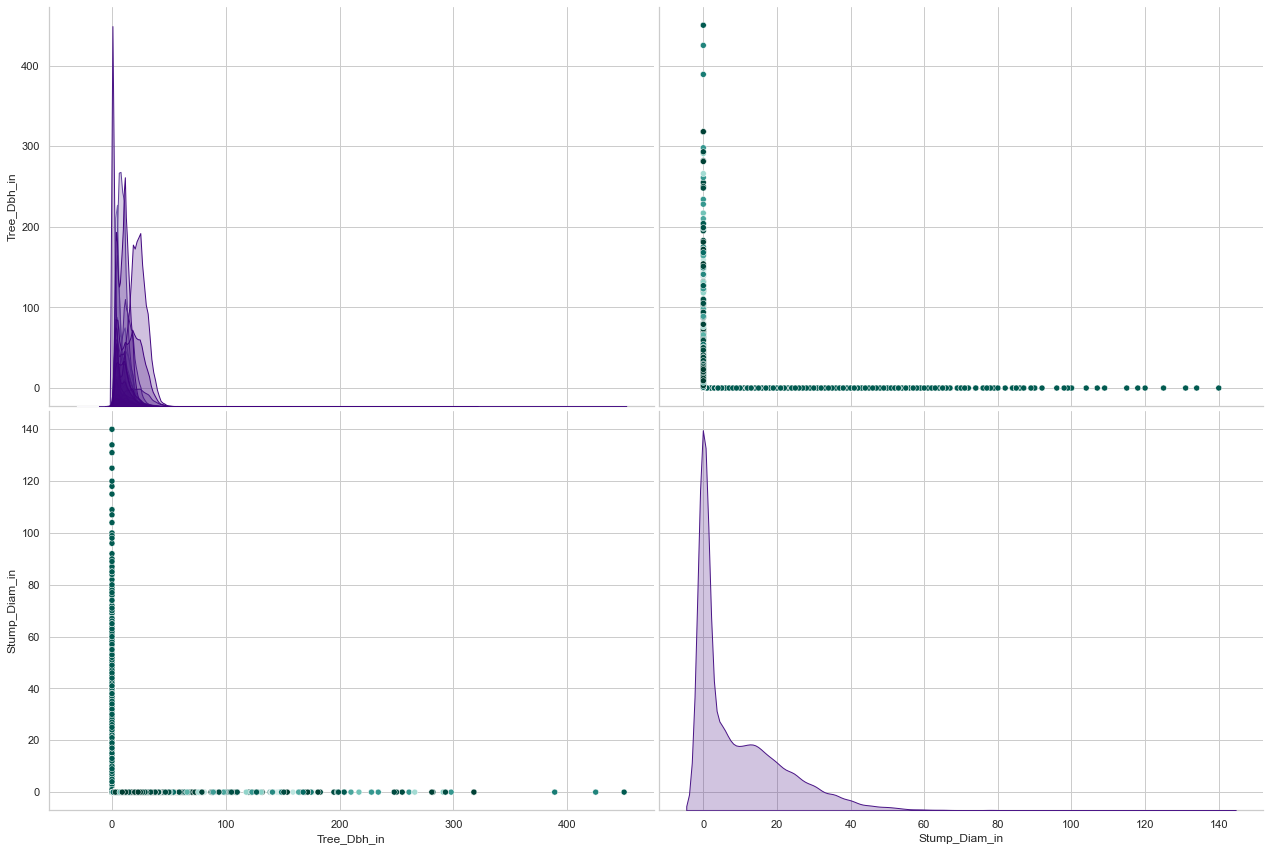

In [27]:
# View entire dataset

# Plot
pp = sns.pairplot(treeSubset,
                  vars = ['Tree_Dbh_in',
                          'Stump_Diam_in'],
                  diag_kind = 'kde',
                  hue = 'Spc_Latin',
                  diag_kws = {'palette':'Purples_r'},
                  kind = 'scatter',
                  palette = 'BrBG_r',
                  height = 6,
                  aspect = 1.5,)

# Customize fig
pp._legend.remove()

# Save fig
# plt.savefig("Tree Diameter Distribution with Binwidth")

# Plot fig
plt.show()

#### Subset Function<br /><br />

Creating a function to use for all my subsets. Just have to make sure to index the first column as the first group by call. Not a perfect function but should save me some time, since I will be running the same operation. 

In [28]:
def subset(data):
    column1 = input("Enter the first column name: ")
    columns = input("Enter the other column names: ").split(", ")
    columns = [column1] + columns # add the first column to the list of other columns
    subset = (data \
        .groupby(columns[0]) \
        .filter(lambda x: len(x) != 0) \
        .groupby(columns[1:len(columns)]) \
        .size() \
        .to_frame('Count') \
        .reset_index()
    )
    return subset

# Features `Root_Stone, Root_Grate, Root_Other... Brch_Other`

In [29]:
# Subset with tree problems

treeProblemResponses = treeSubset[['Root_Stone',
                                   'Root_Grate',
                                   'Root_Other',
                                   'Trunk_Wire',
                                   'Trnk_Light',
                                   'Trnk_Other',
                                   'Brch_Light',
                                   'Brch_Shoe',
                                   'Brch_Other']]
treeProblemResponses.head()

,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other
0,No,No,No,No,No,No,No,No,No
1,Yes,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No
3,Yes,No,No,No,No,No,No,No,No
4,Yes,No,No,No,No,No,No,No,No


In [30]:
# Filter the tree and stump problem (bool responses)

problemDF = treeProblemResponses.apply(pd.Series.value_counts).reset_index()
problemDF

,index,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other
0,No,543789,680252,653466,670514,682757,651215,621423,683377,659433
1,Yes,139999,3536,30322,13274,1031,32573,62365,411,24355


In [31]:
# Execute subset function
# treeSubset cols: Tree_Id / Root_Stone, Root_Grate, Root_Other, Trunk_Wire, Trnk_Light, Trnk_Other, Brch_Light, Brch_Shoe, Brch_Other

subsetYN = subset(treeSubset)
subsetYN.head()

,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other,Count
0,No,No,No,No,No,No,No,No,No,457944
1,No,No,No,No,No,No,No,No,Yes,8352
2,No,No,No,No,No,No,No,Yes,No,103
3,No,No,No,No,No,No,No,Yes,Yes,13
4,No,No,No,No,No,No,Yes,No,No,29452


In [32]:
# Melt responses

probResponses = subsetYN.melt(id_vars = ['Count'],
                        value_vars = ['Root_Stone',
                                      'Root_Grate',
                                      'Root_Other',
                                      'Trunk_Wire',
                                      'Trnk_Light',
                                      'Trnk_Other',
                                      'Brch_Light',
                                      'Brch_Shoe',
                                      'Brch_Other'],
                        var_name = "Problems",
                        value_name = "Responses")
probResponses.head()

,Count,Problems,Responses
0,457944,Root_Stone,No
1,8352,Root_Stone,No
2,103,Root_Stone,No
3,13,Root_Stone,No
4,29452,Root_Stone,No


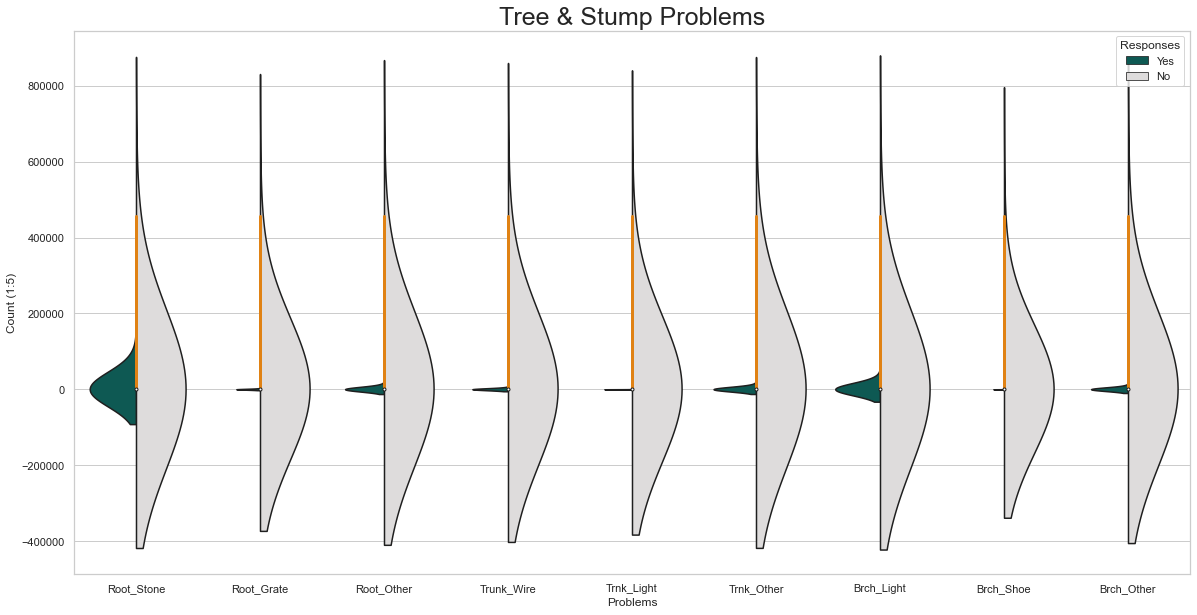

In [33]:
# Visualise responses

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Plot
probLine = sns.lineplot(data = probResponses,
                          y = 'Count',
                          x = 'Problems',
                          units = 'Problems',
                          estimator = None,
                          color = '#e08214',
                          lw = 3)

probVio = sns.violinplot(data = probResponses,
                          y = 'Count',
                          x = 'Problems',
                          split = True,
                          hue = 'Responses',
                          hue_order = ['Yes',
                                       'No'],
                          palette = ['#01665e',
                                     '#dedcdc'],
                          bw = 5.0, # 'scott' / 'silverman' / 0.5
                          scale = 'count',
                          ax=ax)

# Customise fig
ax.set_xlabel('Problems')
ax.set_ylabel('Count (1:5)')
ax.set_title('Tree & Stump Problems',
                    fontsize = 25)

# Save fig
# plt.savefig("Tree & Stump Problems")

# Plot fig
plt.show()

### Features `Tree Diameter` and `Stump Diameter`

Let me zoom in on each feature individually.

In [34]:
# Tree Diameter: Execute subset function
# treeSubset cols: Tree_Id / Tree_Dbh_in
treeDiam = subset(treeSubset)
treeDiam.head()

,Tree_Dbh_in,Count
0,0,17932
1,1,2899
2,2,41977
3,3,54454
4,4,60372


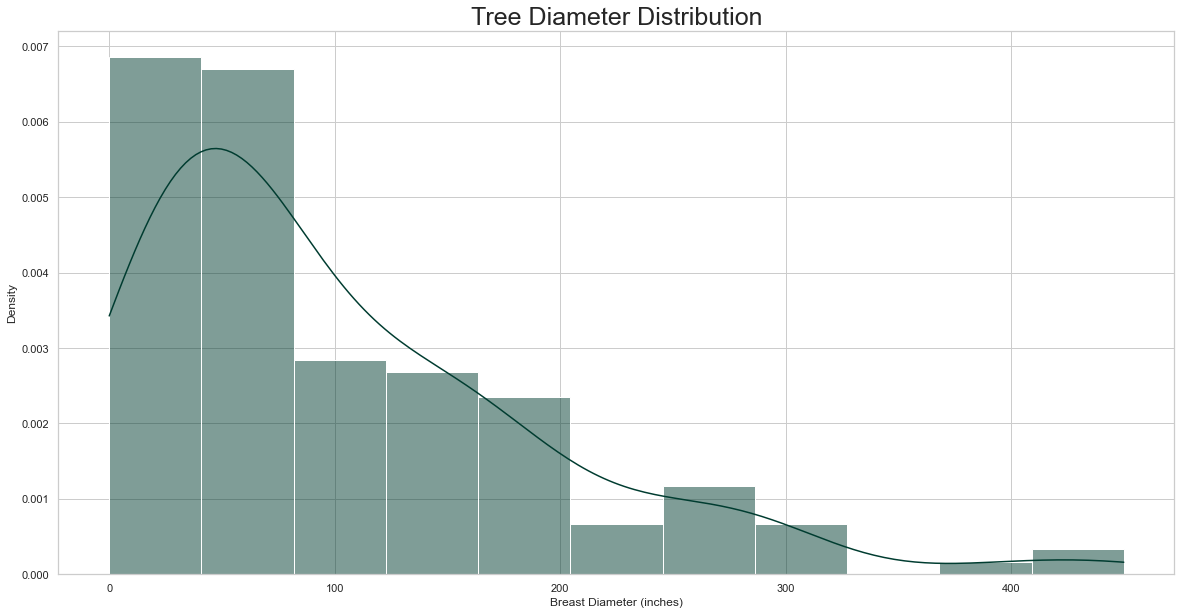

In [35]:
# View tree diameter histogram

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

treeDHist2 = sns.histplot(data = treeDiam,
                            x = 'Tree_Dbh_in',
                            color = '#003c30',
                            kde = True,
                            stat = 'density',
                            ax=ax)

# Customize fig
treeDHist2.set_xlabel('Breast Diameter (inches)')
treeDHist2.set_title('Tree Diameter Distribution',
                    fontsize = 25)

# Save fig
# plt.savefig("Tree Diameter Distribution without Binwidth and Filtered")

# Plot fig
plt.show()

In [36]:
# Stump Diameter: Execute subset function
# treeSubset cols: Tree_Id / Stump_Diam_in

stumpDiam = subset(treeSubset)
stumpDiam.head()

,Stump_Diam_in,Count
0,0,666134
1,1,106
2,2,363
3,3,779
4,4,966


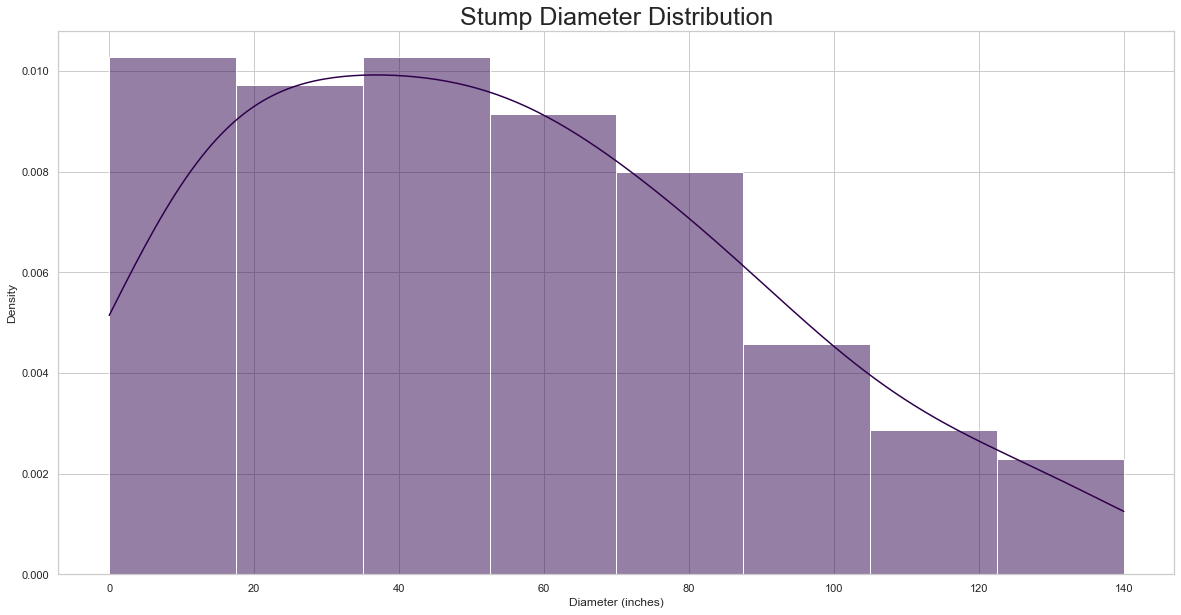

In [37]:
# View stump diameter histogram

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

stumpDHist = sns.histplot(data = stumpDiam,
                            x = 'Stump_Diam_in',
                            color = '#2d004b',
                            kde = True,
                            stat = 'density',
                            ax=ax)

# Customize fig
stumpDHist.set_xlabel('Diameter (inches)')
stumpDHist.set_title('Stump Diameter Distribution',
                    fontsize = 25)

# Save fig
# plt.savefig("Stump Diameter Distribution without Binwidth and Filtered")

# Plot fig
plt.show()

In [38]:
# Get some basic stats on non-string and non-continuos data
# only two cols that are calculable, the tree diameter and stump diameter.

diameterDesc = treeSubset[['Tree_Dbh_in', 'Stump_Diam_in']].describe(include = [np.number], datetime_is_numeric = False)
diameterDesc

,Tree_Dbh_in,Stump_Diam_in
count,683788.000000,683788.000000
mean,11.279787,0.432463
std,8.723042,3.290241
min,0.000000,0.000000
25%,4.000000,0.000000
50%,9.000000,0.000000
75%,16.000000,0.000000
max,450.000000,140.000000


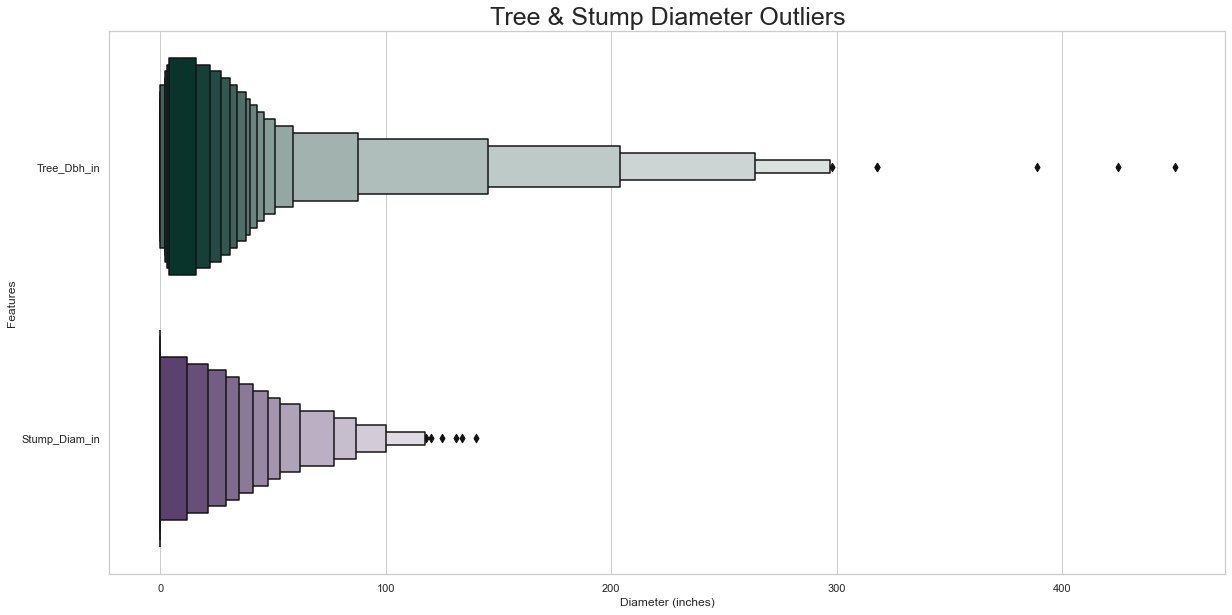

In [39]:
# View outliers of tree and stump diameter

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

treeOutliers = sns.boxenplot(data = treeSubset[["Tree_Dbh_in", "Stump_Diam_in"]],
                             scale = "linear", 
                             palette = ['#003c30', '#2d004b'], 
                             orient = "h", 
                             ax=ax)

# Customize fig
treeOutliers.set_xlabel('Diameter (inches)')
treeOutliers.set_ylabel('Features')
treeOutliers.set_title('Tree & Stump Diameter Outliers',
                        fontsize = 25)

# Save fig
# plt.savefig("Tree & Stump Diameter Outliers")

# Plot fig
plt.show()

Both the tree and stump diameter have a minimum val of 0.00, which is not correct. Could the outliers for both the tree diameter and stump diameter cause those zero minimums?<br /><br />
Also, the biggest tree has a diameter of 450 inches and the biggest stump has a diameter of 140 inches. Let me do an IQR, because those measurements seem to be too big for street trees.

### Interquartile Range Method for Outliers

###### referenced this blog: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/ by Dr. Jason Brownlee. Thank you!

In [40]:
# Calc IQR

treeQ25 = percentile(treeSubset['Tree_Dbh_in'], 25)
treeQ75 = percentile(treeSubset['Tree_Dbh_in'], 75)
treeIQR = treeQ25 - treeQ75

# Outliers cutoff
treeCutOff = treeIQR * 1.5
treelwr = treeQ25 - treeCutOff
treeUpr = treeQ75 + treeCutOff


def calcIQR():

    print(f"Percentiles: 25th={treeQ25}, 75th={treeQ75}, IQR={treeIQR}")

calcIQR()

Percentiles: 25th=4.0, 75th=16.0, IQR=-12.0


In [41]:
# Iterate and identify outliers


treeOutly = [x for x in treeSubset['Tree_Dbh_in'] if x > treelwr and x < treeUpr]
print(f"Identified outliers:{len(treeOutly)}")


Identified outliers:0


In [42]:
# Remove outliers

treeOutlyRmvd = [x for x in treeSubset['Tree_Dbh_in'] if x >= treelwr and x <= treeUpr]
print(f"Non-outlier observations:{len(treeOutlyRmvd)}")

Non-outlier observations:0


### Standard Deviation Method for Outliers

In [43]:
# Calc STD

stumpMean = mean(treeSubset['Stump_Diam_in'])
stumpSTD = std(treeSubset['Stump_Diam_in'])

# Outliers cutoff
stumpCutOff = stumpSTD * 3
stumpLwr = stumpMean - stumpCutOff
stumpUpr = stumpMean + stumpCutOff
print(f"Mean is: {stumpMean} and STD is: {stumpSTD}.")
print(f"Lower-mean is: {stumpLwr} and Upper-mean is: {stumpUpr}.")

Mean is: 0.43246298560372515 and STD is: 3.29023833430287.
Lower-mean is: -9.438252017304883 and Upper-mean is: 10.303177988512335.


In [44]:
# Iterate and identify outliers

stumpOutly = [x for x in treeSubset['Stump_Diam_in'] if x < stumpLwr and x < stumpUpr]
print(f"Identified outliers:{len(stumpOutly)}")

Identified outliers:0


In [45]:
# Remove outliers

stumpOutlyRmvd = [x for x in treeSubset['Stump_Diam_in'] if x >= stumpLwr and x <= stumpUpr]
print(f"Non-outlier observations:{len(stumpOutlyRmvd)}")

Non-outlier observations:672559


### EDA continued...

Stump diameter is mostly made up of zero values so I'll be cautious to when I'll incorporate this feature into to tables and plots. However, I just want to see how many non-zero vals are there for the `Stump Diameter` column.

In [46]:
zeroStumps = treeSubset[treeSubset['Tree_Dbh_in'] != 0]
zeroStumps.head()

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other
0,180683,3,0,OnCurb,Alive,Fair,2015-08-27,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,2015-09-03,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,2015-09-05,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,2015-09-05,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,2015-08-30,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No


In [47]:
# Tail of stump diameter zero table

zeroStumps.tail()

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other
683783,155433,25,0,OnCurb,Alive,Good,2015-08-18,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,2015-08-29,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,2015-08-22,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,2015-08-29,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
683787,200607,23,0,OnCurb,Alive,Fair,2015-09-03,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No


From the outlier plot above, abnormal tree diameters start around `50 inches`. I will modify the dataset so that it doesn't incorporate diameters above `60 inches`.

In [48]:
# View the dataset for diameter below 60 in. 

treeSubset = treeSubset[treeSubset['Tree_Dbh_in'] <= 60]
treeSubset.head()

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other
0,180683,3,0,OnCurb,Alive,Fair,2015-08-27,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,2015-09-03,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,2015-09-05,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,2015-09-05,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,2015-08-30,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No


Original subset had `683788` rows and with the modification there is now `683635` rows.<br /><br />
Now I will separate `Alive` trees from `Stump/Dead` trees and then group them by their scientific names because the alive trees are the largest `Status` type.

In [49]:
# Filter Alive frm Dead/Stumps

aliveTreeSubset = treeSubset[treeSubset['Status'] == 'Alive']

In [50]:
# Group alive trees by species name

aliveTreeSubset.groupby('Spc_Latin')['Tree_Dbh_in'].describe().head()

,count,mean,std,min,25%,50%,75%,max
Spc_Latin,,,,,,,,
Acer,7080.0,11.675424,6.577626,0.0,7.0,11.0,15.0,59.0
Acer buergerianum,110.0,8.090909,4.544470,2.0,5.0,8.0,10.0,28.0
Acer campestre,2549.0,7.103962,4.293100,0.0,4.0,6.0,9.0,35.0
Acer ginnala,2049.0,7.869204,4.853365,0.0,4.0,7.0,10.0,40.0
Acer griseum,220.0,3.509091,3.578846,1.0,2.0,2.0,3.0,30.0


Let me do the same for the dead and stump trees, just because!

In [51]:
# Filter Dead/Stumps frm Alive

stump_deadTreeSubset = treeSubset[(treeSubset['Status'] == 'Dead') & (treeSubset['Status'] == 'Stump')]

For the alive trees subset there are minimum vals of 0 (zero), which is wrong, and the max values seem too large. The 25% to 75% ranges look accurate and I will use these two as a reference.<br /><br />
Let me check for `Tree_Dbh` vals that are lower than 25%, if so, modify to reflect a 25% value and vice versa for the 75% range.

In [52]:
# Group 25% and 75% tree diameters with its scientific name

aliveStats = aliveTreeSubset.groupby('Spc_Latin')['Tree_Dbh_in'] \
                            .describe() \
                            .reset_index()[['Spc_Latin',
                                            '25%',
                                            '75%']]

aliveStats.head()

,Spc_Latin,25%,75%
0,Acer,7.0,15.0
1,Acer buergerianum,5.0,10.0
2,Acer campestre,4.0,9.0
3,Acer ginnala,4.0,10.0
4,Acer griseum,2.0,3.0


In [53]:
# Merge alive stat table with alive tree subset

aliveTreeSubset = aliveTreeSubset.merge(aliveStats,
                                        on = 'Spc_Latin',
                                        how = 'left')
aliveTreeSubset.head()

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other,25%,75%
0,180683,3,0,OnCurb,Alive,Fair,2015-08-27,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,21,0,OnCurb,Alive,Fair,2015-09-03,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,3,0,OnCurb,Alive,Good,2015-09-05,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,10,0,OnCurb,Alive,Good,2015-09-05,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,21,0,OnCurb,Alive,Good,2015-08-30,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,4.0,12.0


In [54]:
# Compare min/max to 25%/75% and modify if conditions are true for tree diameter

stats25Mask = aliveTreeSubset['Tree_Dbh_in'] < aliveTreeSubset['25%']
aliveTreeSubset.loc[stats25Mask, 'Tree_Dbh_in'] = aliveTreeSubset['25%']

stats75Mask = aliveTreeSubset['Tree_Dbh_in'] < aliveTreeSubset['75%']
aliveTreeSubset.loc[stats75Mask, 'Tree_Dbh_in'] = aliveTreeSubset['75%']

In [55]:
# View modified alive tree subsets

aliveTreeSubset.head()

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other,25%,75%
0,180683,14.0,0,OnCurb,Alive,Fair,2015-08-27,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,24.0,0,OnCurb,Alive,Fair,2015-09-03,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,13.0,0,OnCurb,Alive,Good,2015-09-05,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,13.0,0,OnCurb,Alive,Good,2015-09-05,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,21.0,0,OnCurb,Alive,Good,2015-08-30,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,4.0,12.0


Now, I'll create some tables and plot.

In [56]:
# Filter tree diameter with conditions
# aliveTreeSubset cols: Tree_Id / Tree_Dbh_in, Status, Health

aliveTree = subset(aliveTreeSubset)
aliveTree.head()

,Tree_Dbh_in,Status,Health,Count
0,3.00,Alive,Fair,87
1,3.00,Alive,Good,347
2,3.00,Alive,Poor,35
3,3.25,Alive,Fair,38
4,3.25,Alive,Good,165


In [57]:
# Melt alive tree sub

tree = aliveTree.melt(id_vars = ['Tree_Dbh_in',
                                     'Count'],
                          value_vars = ['Status',
                                        'Health'],
                          var_name = "Type",
                          value_name = "Condition")
tree.head()

,Tree_Dbh_in,Count,Type,Condition
0,3.00,87,Status,Alive
1,3.00,347,Status,Alive
2,3.00,35,Status,Alive
3,3.25,38,Status,Alive
4,3.25,165,Status,Alive


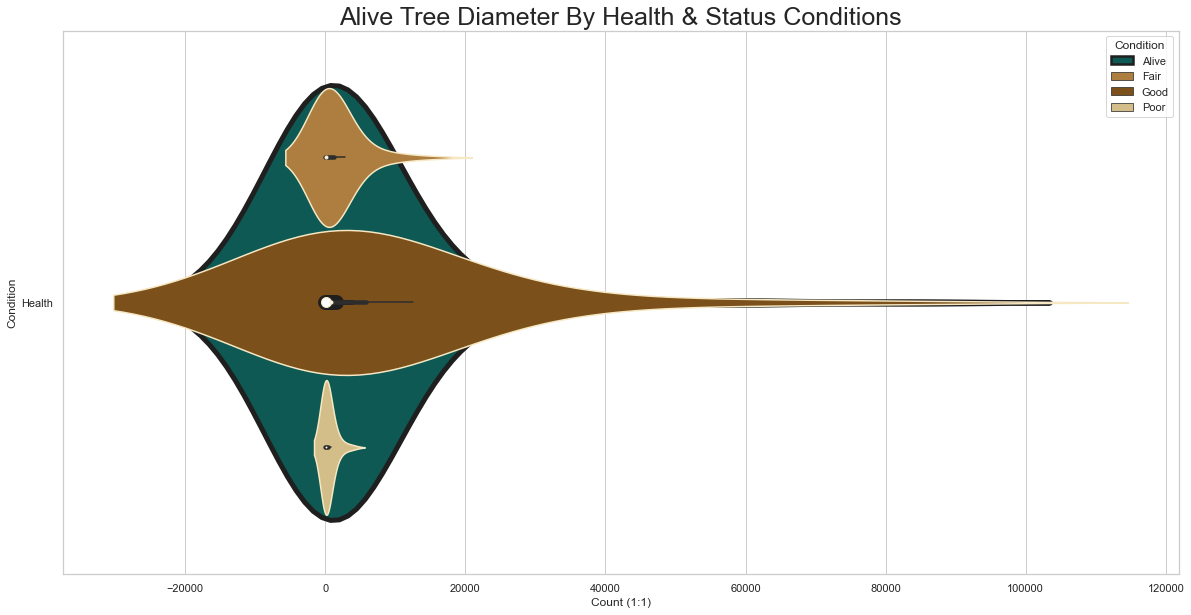

In [58]:
# Visualize alive trees

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))


# Plot both summaries above
sns.violinplot(data = tree[tree['Condition'] == 'Alive'],
               x = 'Count',
               y = 'Type',
               hue = 'Condition',
               size = 'Count',
               palette = ['#01665e'],
               linewidth = 5,
               bw = 1,
               scale = 'count',
               ax=ax)

sns.violinplot(data = tree[tree['Condition'] != 'Alive'],
               x = 'Count',
               y = 'Type',
               hue = 'Condition',
               size = 'Count',
               palette = ['#bf812d',
                          '#8c510a',
                          '#dfc27d'],
               bw = 1,
               scale = 'count',
               ax=ax)


# Customize fig
plt.setp(ax.collections[1:-1], edgecolor="#f6e8c3")
ax.set_xlabel('Count (1:1)')
ax.set_ylabel('Condition')
ax.legend(title='Condition')
ax.set_title('Alive Tree Diameter By Health & Status Conditions',
            fontsize = 25)

# Save fig      
# plt.savefig("Alive Tree Diameter By Health & Status Conditions")

# Plot fig
plt.show()

In [59]:
# Filter stump diameter with conditions to original subset
# treeSubset cols: Tree_Id / Stump_Diam_in, Status, Health

stumpTable = subset(treeSubset)
stumpTable.head()

,Stump_Diam_in,Status,Health,Count
0,0,Alive,Fair,96481
1,0,Alive,Good,528736
2,0,Alive,Poor,26806
3,0,Dead,Not Applicable,13958
4,1,Stump,Not Applicable,106


In [60]:
# Melt stump

stump = stumpTable.melt(id_vars = ['Stump_Diam_in',
                                   'Count'],
                          value_vars = ['Status',
                                        'Health'],
                          var_name = "Type",
                          value_name = "Condition")
stump.head()

,Stump_Diam_in,Count,Type,Condition
0,0,96481,Status,Alive
1,0,528736,Status,Alive
2,0,26806,Status,Alive
3,0,13958,Status,Dead
4,1,106,Status,Stump


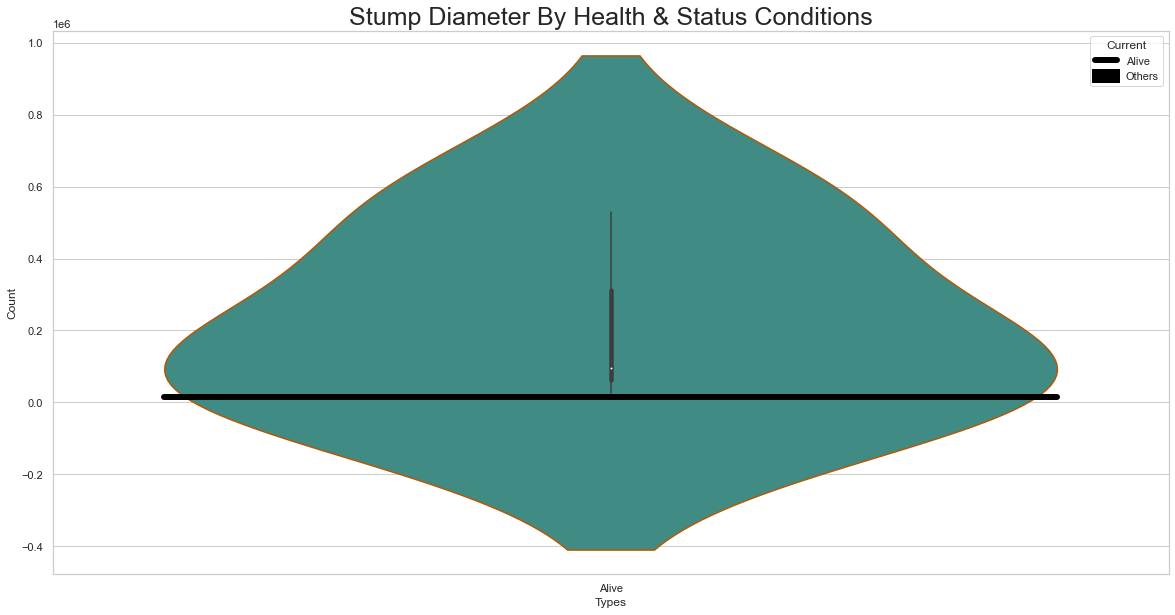

In [61]:
# Visualize summaries

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))


# Plot both summaries above
otherStump = sns.violinplot(data = stump[stump['Condition'] != 'Alive'],
               x = 'Condition',
               y = 'Count',
               color = 'black',
               linewidth = 6,
               split = True,
               scale = 'area',
               ax=ax)

aliveStump = sns.violinplot(data = stump[stump['Condition'] == 'Alive'],
               x = 'Condition',
               y = 'Count',
               color = '#35978f',
               palette = ['#35978f'],
               linewidth = 1.5,
               ax=ax)



# Customize fig
plt.setp(ax.collections[1:-1], edgecolor="#b35806")
ax.set_xlabel('Types')
ax.set_ylabel('Count')
ax.legend(title='Current', labels=["Alive",
                                   "Others"])
ax.set_title('Stump Diameter By Health & Status Conditions',
            fontsize = 25)

# Save fig     
# plt.savefig("Scatter Plot of Age and Fare")

# Plot fig
plt.show()

### Features `Created At` and `Species Scientific Name`

In [62]:
# Subset with tree status, health, and date of creation 

intakeSub = treeSubset[['Tree_Id',
                           'Created_At',
                           'Spc_Latin',
                           'Curb_Loc',
                           'Status',
                           'Health']].copy()
intakeSub.head()

,Tree_Id,Created_At,Spc_Latin,Curb_Loc,Status,Health
0,180683,2015-08-27,Acer rubrum,OnCurb,Alive,Fair
1,200540,2015-09-03,Quercus palustris,OnCurb,Alive,Fair
2,204026,2015-09-05,Gleditsia triacanthos var. inermis,OnCurb,Alive,Good
3,204337,2015-09-05,Gleditsia triacanthos var. inermis,OnCurb,Alive,Good
4,189565,2015-08-30,Tilia americana,OnCurb,Alive,Good


In [63]:
# Filter the intake subset table
# intake Subset cols: Tree_Id / Created_At, Spc_Latin, Curb_Loc, Status, Health

intakeSubset = subset(intakeSub)
intakeSubset.head()

,Created_At,Spc_Latin,Curb_Loc,Status,Health,Count
0,2015-05-19,Acer,OnCurb,Alive,Fair,4
1,2015-05-19,Acer campestre,OnCurb,Alive,Poor,1
2,2015-05-19,Acer platanoides,OnCurb,Alive,Fair,6
3,2015-05-19,Acer platanoides,OnCurb,Alive,Good,4
4,2015-05-19,Acer platanoides,OnCurb,Alive,Poor,1


In [64]:
# Add a month col to store months from Created_At

intakeSubset['Month'] = pd.to_datetime(intakeSubset['Created_At']).dt.month
intakeSubset.head()

,Created_At,Spc_Latin,Curb_Loc,Status,Health,Count,Month
0,2015-05-19,Acer,OnCurb,Alive,Fair,4,5
1,2015-05-19,Acer campestre,OnCurb,Alive,Poor,1,5
2,2015-05-19,Acer platanoides,OnCurb,Alive,Fair,6,5
3,2015-05-19,Acer platanoides,OnCurb,Alive,Good,4,5
4,2015-05-19,Acer platanoides,OnCurb,Alive,Poor,1,5


In [65]:
# Add a day col to store days from Created_At

intakeSubset['Day'] = pd.to_datetime(intakeSubset['Created_At']).dt.day
intakeSubset.head()

,Created_At,Spc_Latin,Curb_Loc,Status,Health,Count,Month,Day
0,2015-05-19,Acer,OnCurb,Alive,Fair,4,5,19
1,2015-05-19,Acer campestre,OnCurb,Alive,Poor,1,5,19
2,2015-05-19,Acer platanoides,OnCurb,Alive,Fair,6,5,19
3,2015-05-19,Acer platanoides,OnCurb,Alive,Good,4,5,19
4,2015-05-19,Acer platanoides,OnCurb,Alive,Poor,1,5,19


In [66]:
# Add a year col to store years from Created_At

intakeSubset['Year'] = pd.to_datetime(intakeSubset['Created_At']).dt.year
intakeSubset.head()

,Created_At,Spc_Latin,Curb_Loc,Status,Health,Count,Month,Day,Year
0,2015-05-19,Acer,OnCurb,Alive,Fair,4,5,19,2015
1,2015-05-19,Acer campestre,OnCurb,Alive,Poor,1,5,19,2015
2,2015-05-19,Acer platanoides,OnCurb,Alive,Fair,6,5,19,2015
3,2015-05-19,Acer platanoides,OnCurb,Alive,Good,4,5,19,2015
4,2015-05-19,Acer platanoides,OnCurb,Alive,Poor,1,5,19,2015


In [67]:
# Create a month dictionary to use with month column

monthDict = {1: 'jan',
             2: 'feb',
             3: 'mar',
             4: 'apr',
             5: 'may',
             6: 'jun',
             7: 'jul',
             8: 'aug',
             9: 'sep',
             10: 'oct',
             11: 'nov',
             12: 'dec'}

# map to month col

intakeSubset['Month'] = intakeSubset['Month'].map(monthDict)

In [68]:
# Day dictionary to use with day column

dayDict = {1: '1st', 2: '2nd', 3: '3rd', 4: '4th', 5: '5th', 6: '6th', 7: '7th', 8: '8th', 9: '9th', 10: '10th',
           11: '11th', 12: '12th', 13: '13th', 14: '14th', 15: '15th', 16: '16th', 17: '17th', 18: '18th',
           19: '19th', 20: '20th', 21: '21st', 22: '22nd', 23: '23rd', 24: '24th', 25: '25th', 26: '26th',
           27: '27th', 28: '28th', 29: '29th', 30: '30th', 31: '31st', 32: '32nd'}

# map to day col

intakeSubset['Day'] = intakeSubset['Day'].map(dayDict)

In [69]:
# Year dictionary for year column
# Dataset has only has yrs 2015, 2016

yearDict = {2015: '2015', 2016: '2016'}

# map to yr col

intakeSubset['Year'] = intakeSubset['Year'].map(yearDict)

In [70]:
# Calculate a mean column of the counts per month/day/yr

monthlyMean = intakeSubset.groupby('Month')['Count'].mean()
intakeSubset['Mean_mth'] = intakeSubset['Month'].map(monthlyMean)

dailyMean = intakeSubset.groupby('Day')['Count'].mean()
intakeSubset['Mean_day'] = intakeSubset['Day'].map(dailyMean)

yearlyMean = intakeSubset.groupby('Year')['Count'].mean()
intakeSubset['Mean_yr'] = intakeSubset['Year'].map(yearlyMean)

intakeSubset.head()

,Created_At,Spc_Latin,Curb_Loc,Status,Health,Count,Month,Day,Year,Mean_mth,Mean_day,Mean_yr
0,2015-05-19,Acer,OnCurb,Alive,Fair,4,may,19th,2015,6.62098,12.242553,13.448361
1,2015-05-19,Acer campestre,OnCurb,Alive,Poor,1,may,19th,2015,6.62098,12.242553,13.448361
2,2015-05-19,Acer platanoides,OnCurb,Alive,Fair,6,may,19th,2015,6.62098,12.242553,13.448361
3,2015-05-19,Acer platanoides,OnCurb,Alive,Good,4,may,19th,2015,6.62098,12.242553,13.448361
4,2015-05-19,Acer platanoides,OnCurb,Alive,Poor,1,may,19th,2015,6.62098,12.242553,13.448361


In [71]:
# Evaluate curb location

intakeTable = intakeSubset['Curb_Loc'].value_counts()
intakeTable

OnCurb            49145
OffsetFromCurb     7595
Name: Curb_Loc, dtype: int64

In [72]:
# Filter for curb location
# intake Subset cols: Curb_Loc / Curb_Loc, Status, Health

curbLocation = subset(intakeSubset)
curbLocation

,Curb_Loc,Status,Health,Count
0,OffsetFromCurb,Alive,Fair,1790
1,OffsetFromCurb,Alive,Good,4813
2,OffsetFromCurb,Alive,Poor,615
3,OffsetFromCurb,Dead,Not Applicable,176
4,OffsetFromCurb,Stump,Not Applicable,201
5,OnCurb,Alive,Fair,14190
6,OnCurb,Alive,Good,26221
7,OnCurb,Alive,Poor,7850
8,OnCurb,Dead,Not Applicable,430
9,OnCurb,Stump,Not Applicable,454


In [73]:
# Melt curb table

curbs = curbLocation.melt(id_vars = ['Curb_Loc',
                                     'Count'],
                          value_vars = ['Status',
                                        'Health'],
                          var_name = "Type",
                          value_name = "Condition")
curbs.head()

,Curb_Loc,Count,Type,Condition
0,OffsetFromCurb,1790,Status,Alive
1,OffsetFromCurb,4813,Status,Alive
2,OffsetFromCurb,615,Status,Alive
3,OffsetFromCurb,176,Status,Dead
4,OffsetFromCurb,201,Status,Stump


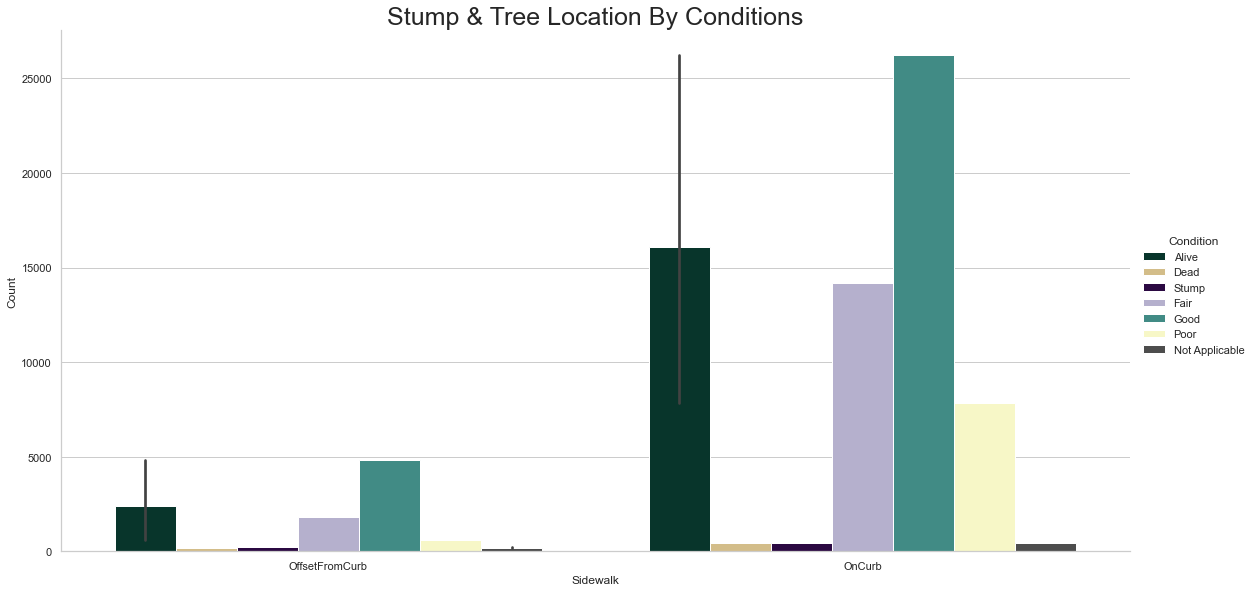

In [74]:
# Visualise sidewalk relation to Conditions


# Plot
sidewalkLocation = sns.catplot(data = curbs,
                               x = 'Curb_Loc',
                               y = 'Count',
                               hue = 'Condition',
                               palette = ['#003c30',
                                          '#dfc27d',
                                          '#2d004b',
                                          '#b2abd2',
                                          '#35978f',
                                          '#ffffbf',
                                          '#4d4d4d'],
                               kind = "bar",
                               height = 8,
                               aspect = 2
)


# Customize fig
sidewalkLocation.set_axis_labels('Sidewalk', 'Count')
plt.title('Stump & Tree Location By Conditions',
         size = 25)

# Save fig     
# plt.savefig("Stump & Tree Location By Conditions")

# Plot fig
plt.show()

In [75]:
speciesTable = intakeSubset['Spc_Latin'].value_counts()
speciesTable.head()

Platanus x acerifolia                 1689
Quercus palustris                     1572
Acer platanoides                      1550
Gleditsia triacanthos var. inermis    1525
Pyrus calleryana                      1449
Name: Spc_Latin, dtype: int64

In [76]:
# Filter for species name & condition
# intakeSubset cols: Spc_Latin / Spc_Latin, Status, Health

nameTable = subset(intakeSubset)
nameTable.head()

,Spc_Latin,Status,Health,Count
0,Acer,Alive,Fair,283
1,Acer,Alive,Good,374
2,Acer,Alive,Poor,178
3,Acer buergerianum,Alive,Fair,16
4,Acer buergerianum,Alive,Good,40


In [77]:
# Melt species name

species = nameTable.melt(id_vars = ['Spc_Latin',
                                     'Count'],
                          value_vars = ['Status',
                                        'Health'],
                          var_name = "Type",
                          value_name = "Condition")
species.head()

,Spc_Latin,Count,Type,Condition
0,Acer,283,Status,Alive
1,Acer,374,Status,Alive
2,Acer,178,Status,Alive
3,Acer buergerianum,16,Status,Alive
4,Acer buergerianum,40,Status,Alive


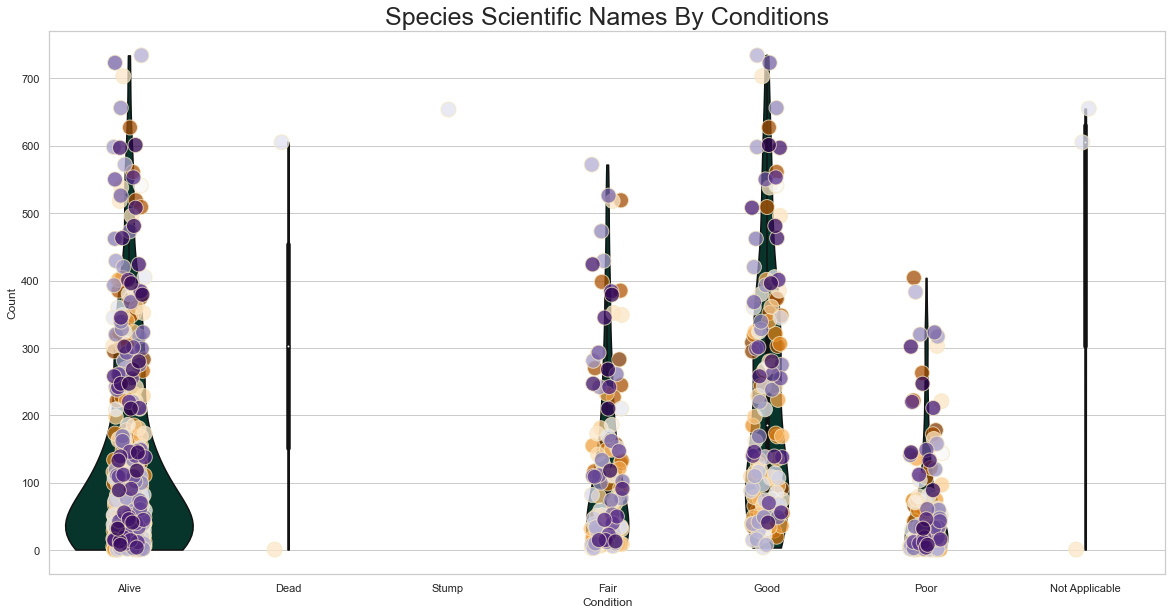

In [78]:
# Visualise species names in relation to Conditions


# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Plot
ax = sns.violinplot(data = species, 
                  x = 'Condition', 
                  y = 'Count',
                  color = '#003c30',
                  scale = 'count', # 'area' / -->'count' / 'width'
                  cut = 0
)

ax = sns.stripplot(data = species, 
              x = 'Condition', 
              y = 'Count', 
              hue = 'Spc_Latin',
              size = 15,
              palette = 'PuOr',
              edgecolor = '#f6e8c3',
              linewidth = 1,
              jitter = True, 
              alpha = .75
)

# Customize fig
ax.set_xlabel('Condition')
ax.set_ylabel('Count')
plt.title('Species Scientific Names By Conditions',
           size = 25)
ax.get_legend().remove()

# Save fig     
# plt.savefig("Species Scientific Names By Conditions")

# Plot fig
plt.show()

In [79]:
# Evaluate created_at column

dateTable = intakeSubset['Created_At'].value_counts()
dateTable

2015-10-13    303
2015-10-26    289
2015-11-03    288
2015-11-02    287
2015-10-27    284
             ... 
2016-10-04      4
2016-03-19      3
2016-03-02      3
2016-04-03      2
2016-03-14      1
Name: Created_At, Length: 483, dtype: int64

In [80]:
# Filter for dates & conditions
# intakeSubset cols: Created_At / Month, Day, Year, Status, Health

datesConditions = subset(intakeSubset)
datesConditions.head()

,Month,Day,Year,Status,Health,Count
0,apr,10th,2016,Alive,Good,7
1,apr,10th,2016,Stump,Not Applicable,1
2,apr,11th,2016,Alive,Fair,11
3,apr,11th,2016,Alive,Good,23
4,apr,11th,2016,Alive,Poor,5


In [81]:
# Melt date & conditions

datesByCond = datesConditions.melt(id_vars = ['Month',
                                              'Day',
                                              'Year',
                                              'Count'],
                               value_vars = ['Status',
                                             'Health'],
                               var_name = "Type",
                               value_name = "Condition")
datesByCond.head()

,Month,Day,Year,Count,Type,Condition
0,apr,10th,2016,7,Status,Alive
1,apr,10th,2016,1,Status,Stump
2,apr,11th,2016,11,Status,Alive
3,apr,11th,2016,23,Status,Alive
4,apr,11th,2016,5,Status,Alive


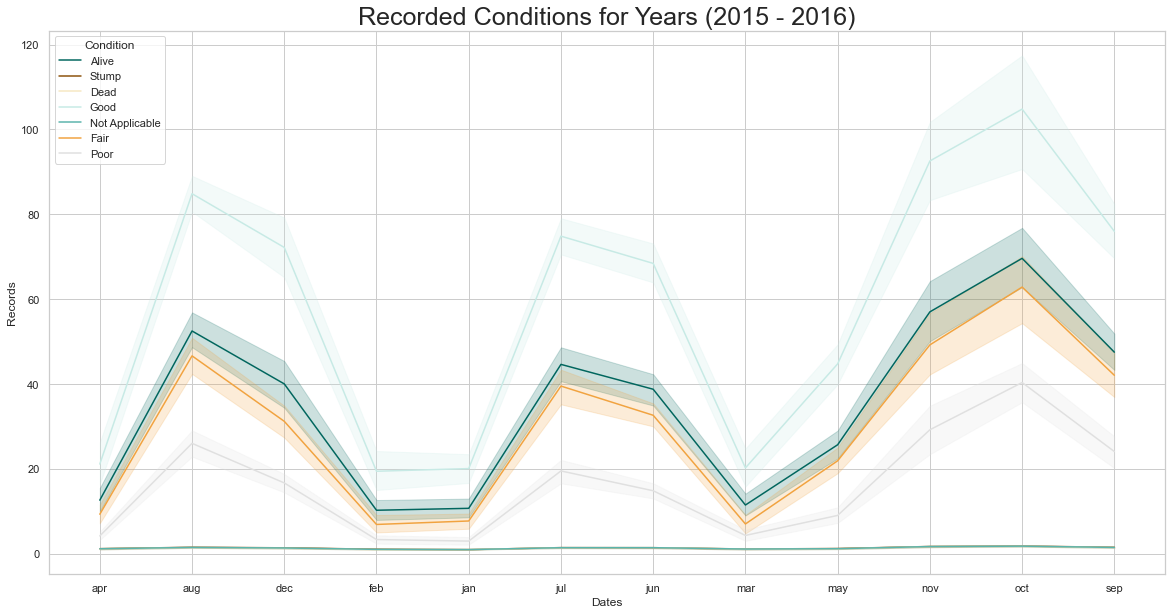

In [82]:
# Visualise when conditions were recorded

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))


# Plot
sns.lineplot(data = datesByCond,
             x = 'Month',
             y = 'Count',
             hue = 'Condition',
             palette = ['#01665e',
                        '#8c510a',
                        '#f6e8c3',
                        '#c7eae5',
                        '#5ab4ac',
                        '#f1a340',
                        '#e0e0e0'])
             

# Customize fig
ax.set_xlabel('Dates')
ax.set_ylabel('Records')
plt.title('Recorded Conditions for Years (2015 - 2016)',
           size = 25)


# Save fig     
# plt.savefig("Recorded Conditions for Two Years")

# Plot fig
plt.show()

In [83]:
# Filter for dates & curb location
# intakeSubset cols: Created_At / Curb_Loc, Month, Day, Year, Status, Health

datesSidewalk = subset(intakeSubset)
datesSidewalk.head()

,Curb_Loc,Month,Day,Year,Status,Health,Count
0,OffsetFromCurb,apr,11th,2016,Alive,Fair,1
1,OffsetFromCurb,apr,11th,2016,Alive,Good,4
2,OffsetFromCurb,apr,11th,2016,Alive,Poor,1
3,OffsetFromCurb,apr,16th,2016,Alive,Good,1
4,OffsetFromCurb,apr,18th,2016,Alive,Fair,2


In [84]:
# Melt date & curb locations

datesByCurbs = datesSidewalk.melt(id_vars = ['Month',
                                             'Day',
                                             'Year',
                                             'Curb_Loc',
                                             'Count'],
                               value_vars = ['Status',
                                             'Health'],
                               var_name = "Type",
                               value_name = "Condition")
datesByCurbs.head()

,Month,Day,Year,Curb_Loc,Count,Type,Condition
0,apr,11th,2016,OffsetFromCurb,1,Status,Alive
1,apr,11th,2016,OffsetFromCurb,4,Status,Alive
2,apr,11th,2016,OffsetFromCurb,1,Status,Alive
3,apr,16th,2016,OffsetFromCurb,1,Status,Alive
4,apr,18th,2016,OffsetFromCurb,2,Status,Alive


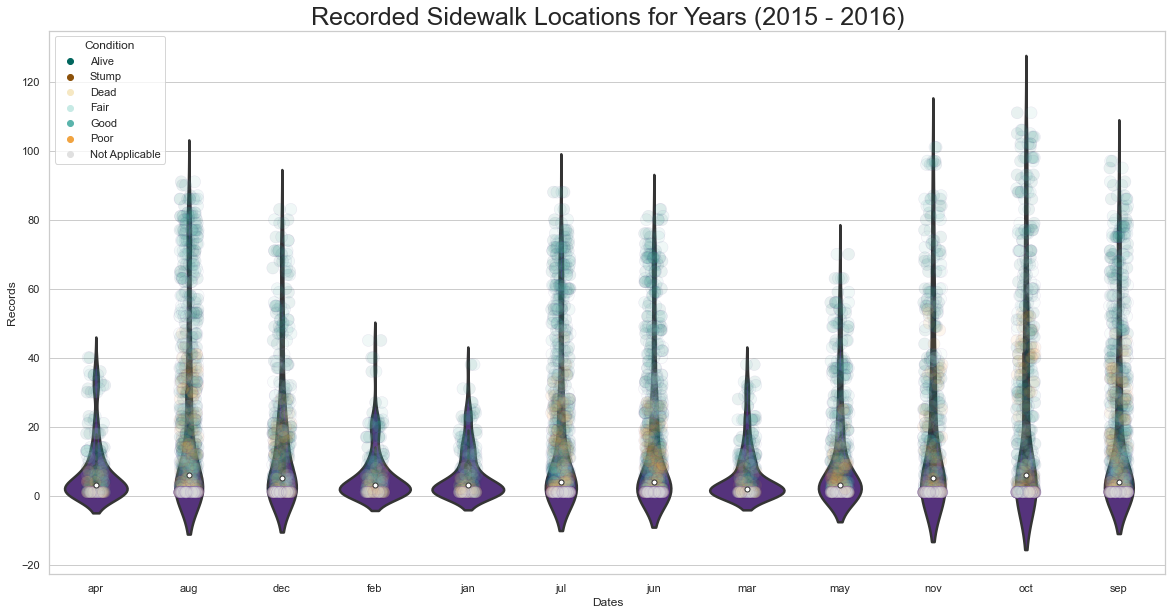

In [85]:
# Visualise recorded curb locations

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))


# Plot
sns.stripplot(data = datesByCurbs,
             x = 'Month',
             y = 'Count',
             hue = 'Condition',
             palette = ['#01665e',
                        '#8c510a',
                        '#f6e8c3',
                        '#c7eae5',
                        '#5ab4ac',
                        '#f1a340',
                        '#e0e0e0'],
             edgecolor = '#542788',
             linewidth = 0.5,
             alpha = 0.09,
             jitter = True,
             size = 12)

sns.violinplot(data = datesByCurbs,
             x = 'Month',
             y = 'Count',
             linewidth = 2.5,
             color = '#542788')
             

# Customize fig
ax.set_xlabel('Dates')
ax.set_ylabel('Records')
plt.title('Recorded Sidewalk Locations for Years (2015 - 2016)',
           size = 25)


# Save fig     
# plt.savefig("Recorded Conditions for Two Years")

# Plot fig
plt.show()

In [86]:
# Filter for dates & scientific names
# intakeSubset cols: Spc_Latin / Month, Day, Year

datesByNames = subset(intakeSubset)
datesByNames.head()

,Month,Day,Year,Count
0,apr,10th,2016,8
1,apr,11th,2016,41
2,apr,12th,2016,12
3,apr,14th,2016,20
4,apr,15th,2016,26


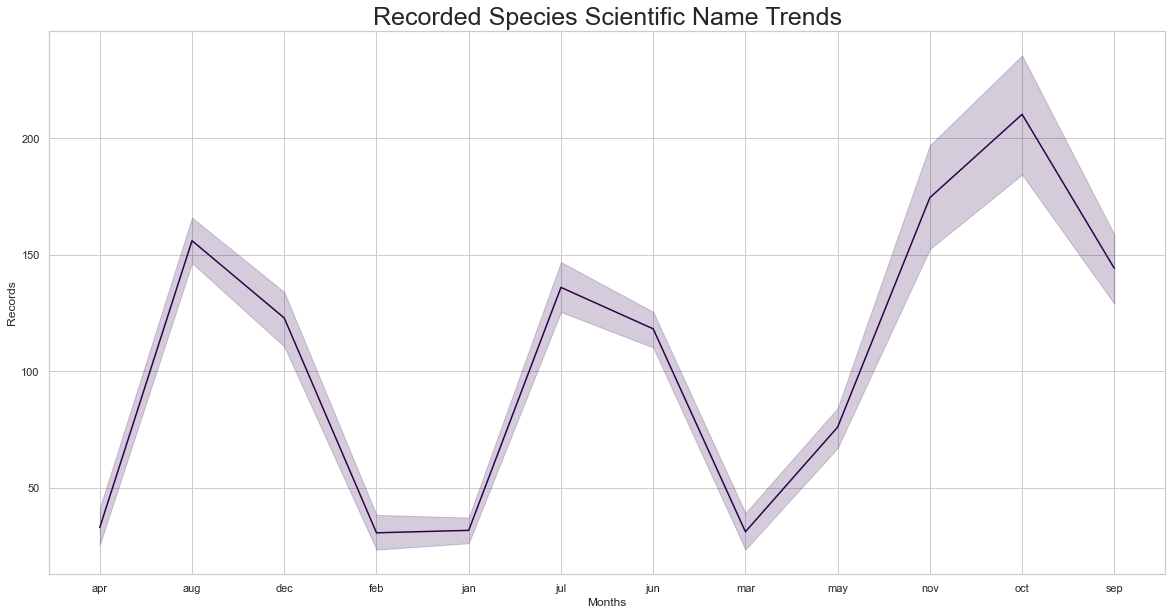

In [86]:
# Visualise scientific names recorded

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))


# Plot
sns.lineplot(data = datesByNames,
             x = 'Month',
             y = 'Count',
             color = '#2d004b')
             

# Customize fig
ax.set_xlabel('Months')
ax.set_ylabel('Records')
plt.title('Recorded Species Scientific Name Trends',
           size = 25)


# Save fig     
# plt.savefig("Recorded Species Scientific Names")

# Plot fig
plt.show()